In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, estimate_bandwidth


In [2]:
df=pd.read_csv('PS_2024.05.01_12.16.29.csv', delimiter=',', skiprows=96)

In [3]:
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23


In [4]:
df.shape

(35921, 92)

In [5]:
df.duplicated().sum()

54

In [6]:
df=df.drop_duplicates()

In [7]:

print(f"Dataset has {df.shape[0]} records and {df.shape[1]} features.")

Dataset has 35867 records and 92 features.


In [8]:
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23


In [9]:
df.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35867 entries, 0 to 35920
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          35867 non-null  object 
 1   hostname         35867 non-null  object 
 2   default_flag     35867 non-null  int64  
 3   sy_snum          35867 non-null  int64  
 4   sy_pnum          35867 non-null  int64  
 5   discoverymethod  35867 non-null  object 
 6   disc_year        35867 non-null  int64  
 7   disc_facility    35867 non-null  object 
 8   soltype          35867 non-null  object 
 9   pl_controv_flag  35867 non-null  int64  
 10  pl_refname       35867 non-null  object 
 11  pl_orbper        32819 non-null  float64
 12  pl_orbpererr1    31336 non-null  float64
 13  pl_orbpererr2    31335 non-null  float64
 14  pl_orbperlim     32819 non-null  float64
 15  pl_orbsmax       19680 non-null  float64
 16  pl_orbsmaxerr1   5247 non-null   float64
 17  pl_orbsmaxerr2   

In [11]:
# Dropping columns with the object datatype 
numeric_outputs=df.select_dtypes(include=np.number)
numeric_outputs_dropped=numeric_outputs.drop('disc_year', axis=1)

numeric_outputs_dropped

,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,0,2,1,0,NaN,NaN,NaN,NaN,1.210,0.06,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,0,2,1,0,326.03000,0.32,-0.32,0.0,1.290,0.05,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,1,2,1,0,323.21000,0.06,-0.05,0.0,1.178,0.00,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
3,1,1,1,0,516.21997,3.20,-3.20,0.0,1.530,0.07,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
4,0,1,1,0,NaN,NaN,NaN,NaN,1.510,0.06,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35916,0,2,3,0,1319.00000,18.00,-18.00,0.0,2.570,NaN,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
35917,1,1,1,0,385.20000,2.80,-1.30,0.0,1.180,0.11,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
35918,0,1,1,0,NaN,NaN,NaN,NaN,0.580,0.02,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837
35919,0,1,1,0,136.75000,0.25,-0.25,0.0,0.680,NaN,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [12]:
print(f"Distribution of planets with different number of stars in the system: {numeric_outputs_dropped.sy_snum.value_counts().sort_index()}")

Distribution of planets with different number of stars in the system: sy_snum
1    33127
2     2432
3      304
4        4
Name: count, dtype: int64


In [13]:
#Create dataframe with columns that have float datatype
floats=df.select_dtypes(include=float)
print(f"{floats.shape[1]} features have float datatype.")

70 features have float datatype.


In [14]:
floats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35867 entries, 0 to 35920
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_orbper        32819 non-null  float64
 1   pl_orbpererr1    31336 non-null  float64
 2   pl_orbpererr2    31335 non-null  float64
 3   pl_orbperlim     32819 non-null  float64
 4   pl_orbsmax       19680 non-null  float64
 5   pl_orbsmaxerr1   5247 non-null   float64
 6   pl_orbsmaxerr2   5246 non-null   float64
 7   pl_orbsmaxlim    22443 non-null  float64
 8   pl_rade          24435 non-null  float64
 9   pl_radeerr1      23706 non-null  float64
 10  pl_radeerr2      23706 non-null  float64
 11  pl_radelim       27177 non-null  float64
 12  pl_radj          11317 non-null  float64
 13  pl_radjerr1      10632 non-null  float64
 14  pl_radjerr2      10632 non-null  float64
 15  pl_radjlim       11317 non-null  float64
 16  pl_bmasse        5842 non-null   float64
 17  pl_bmasseerr1    

In [15]:
#Dropping columns that have 1 or 2 at the end of title
floats_main = floats[floats.columns.drop(list(floats.filter(regex='[12]$')))]

In [16]:
print(f"{floats_main.shape[1]} features left.")

34 features left.


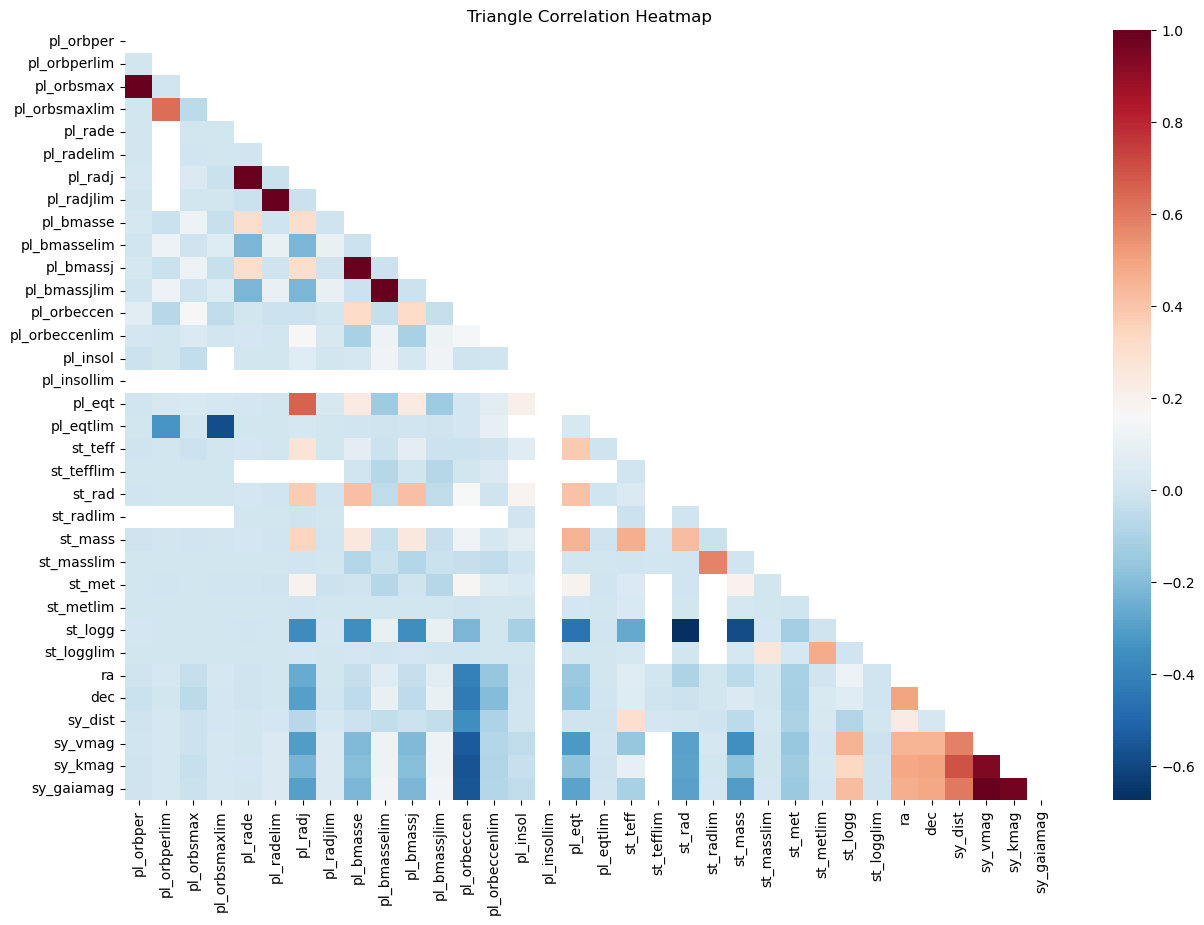

In [17]:
#Lets explore correlation between features

import seaborn as sn

plt.figure(figsize=(15, 10)) 
plt.title("Triangle Correlation Heatmap")

# The correlation matrix
corr_mat = floats_main.corr()

mask=np.triu(np.ones_like(corr_mat))
dataplot=sn.heatmap(corr_mat, cmap='RdBu_r', mask=mask)

plt.show()

## An examination of the skew values in anticipation of transformations

In [18]:
skew_columns=(floats_main.skew().sort_values(ascending=False))
skew_columns=skew_columns.loc[skew_columns>0.75]
skew_columns

st_tefflim        181.802090
pl_orbper         180.847155
st_radlim         128.627368
pl_insol           99.372635
pl_eqtlim          79.462778
pl_orbsmax         71.894255
pl_rade            48.483587
st_rad             24.300645
st_mass            15.631157
st_teff            14.767241
pl_orbeccenlim     11.153937
sy_dist             4.688880
pl_bmasselim        4.308458
pl_bmassjlim        4.308034
pl_bmasse           4.217767
pl_bmassj           4.217653
pl_orbeccen         3.815112
pl_radj             2.828306
pl_eqt              1.226279
st_met              0.968504
dtype: float64

In [19]:
for col in skew_columns.index.tolist():
    floats_main[col]=np.log1p(floats_main[col])

## Perform feature scaling (ignore)

In [20]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
floats_main_scaled=floats_main.copy()

floats_main.replace([np.inf, -np.inf], np.nan, inplace=True)

for col in floats_main.columns:
    
    nan_mask=floats_main[col].isnull()
    
    col_values=np.array(floats_main[col]).reshape(-1,1)
    
    scaled_col=sc.fit_transform(col_values[~nan_mask])
    
    floats_main_scaled.loc[~nan_mask, col]=scaled_col.flatten()

floats_main_scaled.head()

,pl_orbper,pl_orbperlim,pl_orbsmax,pl_orbsmaxlim,pl_rade,pl_radelim,pl_radj,pl_radjlim,pl_bmasse,pl_bmasselim,...,st_met,st_metlim,st_logg,st_logglim,ra,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,NaN,NaN,1.070789,0.011562,NaN,NaN,NaN,NaN,1.672091,-0.190421,...,NaN,NaN,NaN,NaN,-1.152113,-0.537403,-1.409044,-3.687572,-4.021760,-3.806210
1,2.066125,0.011803,1.141322,0.011562,NaN,NaN,NaN,NaN,1.730567,-0.190421,...,-1.296759,0.015534,-7.125533,0.003373,-1.152113,-0.537403,-1.409044,-3.687572,-4.021760,-3.806210
2,2.060305,0.011803,1.041858,0.011562,NaN,NaN,NaN,NaN,1.625502,-0.190421,...,-0.844423,0.015534,-6.650669,0.003373,-1.152113,-0.537403,-1.409044,-3.687572,-4.021760,-3.806210
3,2.374196,0.011803,1.339015,0.011562,NaN,NaN,NaN,NaN,1.603284,-0.190421,...,0.135405,0.015534,-8.414448,0.003373,-0.511071,1.451486,-1.148282,-3.567445,-4.169721,-3.754425
4,NaN,NaN,1.323272,0.011562,NaN,NaN,NaN,NaN,1.459137,-0.190421,...,NaN,NaN,NaN,NaN,-0.511071,1.451486,-1.148282,-3.567445,-4.169721,-3.754425


## Scatter plots

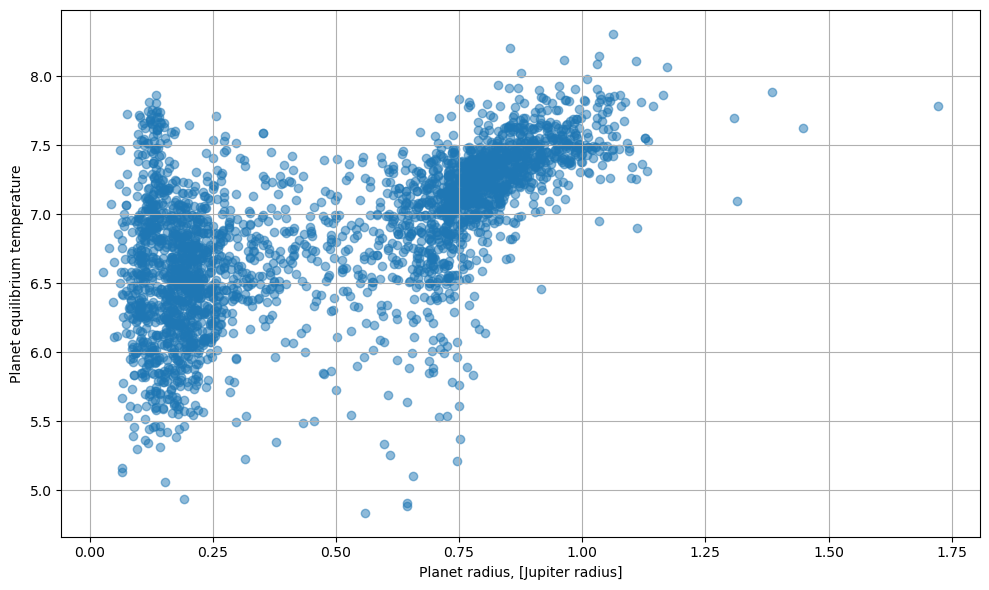

In [21]:
plt.figure(figsize=(10, 6)) 
plt.scatter(y=floats_main['pl_eqt'], x=floats_main['pl_radj'], alpha=0.5)
plt.ylabel("Planet equilibrium temperature")
plt.xlabel("Planet radius, [Jupiter radius]")
#plt.title('Scatter Plot of Orbital Period vs Semi-Major Axis')

#plt.legend(title='Planet Mass (Earth Masses)', scatterpoints=1, loc='upper left', fontsize=8, 
#           labelspacing=1.5, title_fontsize=10, handlelength=2, handletextpad=2, markerscale=0.5, fancybox=True)

#plt.xscale('log')
#plt.yscale('log')

plt.grid(True)
#plt.legend()
plt.tight_layout()    
plt.show()

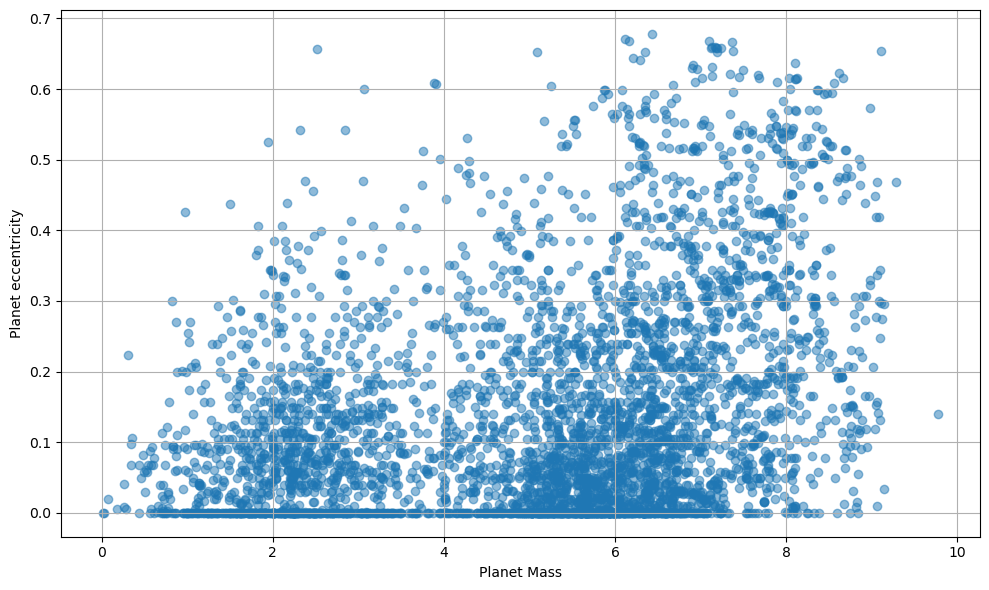

In [88]:
plt.figure(figsize=(10, 6)) 
plt.scatter(x=floats_main['pl_bmasse'], y=floats_main['pl_orbeccen'], alpha=0.5)
plt.xlabel("Planet Mass")
plt.ylabel("Planet eccentricity")
#plt.title('Scatter Plot of Orbital Period vs Semi-Major Axis')

#plt.legend(title='Planet Mass (Earth Masses)', scatterpoints=1, loc='upper left', fontsize=8, 
#           labelspacing=1.5, title_fontsize=10, handlelength=2, handletextpad=2, markerscale=0.5, fancybox=True)

#plt.xscale('log')
#plt.yscale('log')

plt.grid(True)
#plt.legend()
plt.tight_layout()    
plt.show()

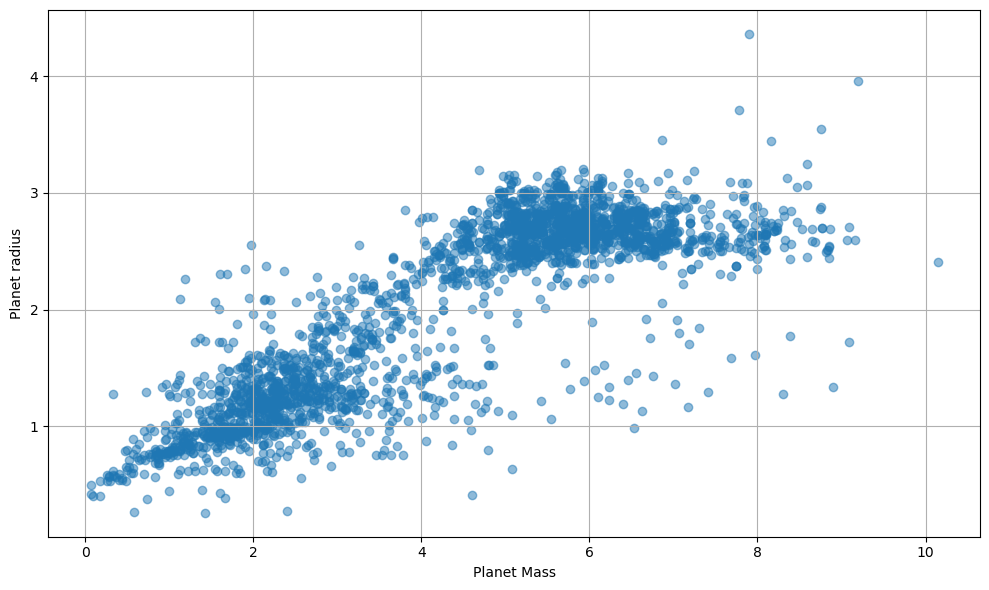

In [87]:
plt.figure(figsize=(10, 6)) 
plt.scatter(x=floats_main['pl_bmasse'], y=floats_main['pl_rade'], alpha=0.5)
plt.xlabel("Planet Mass")
plt.ylabel("Planet radius")
#plt.title('Scatter Plot of Orbital Period vs Semi-Major Axis')

#plt.legend(title='Planet Mass (Earth Masses)', scatterpoints=1, loc='upper left', fontsize=8, 
#           labelspacing=1.5, title_fontsize=10, handlelength=2, handletextpad=2, markerscale=0.5, fancybox=True)

#plt.xscale('log')
#plt.yscale('log')

plt.grid(True)
#plt.legend()
plt.tight_layout()    
plt.show()

## 3D K-means clustering

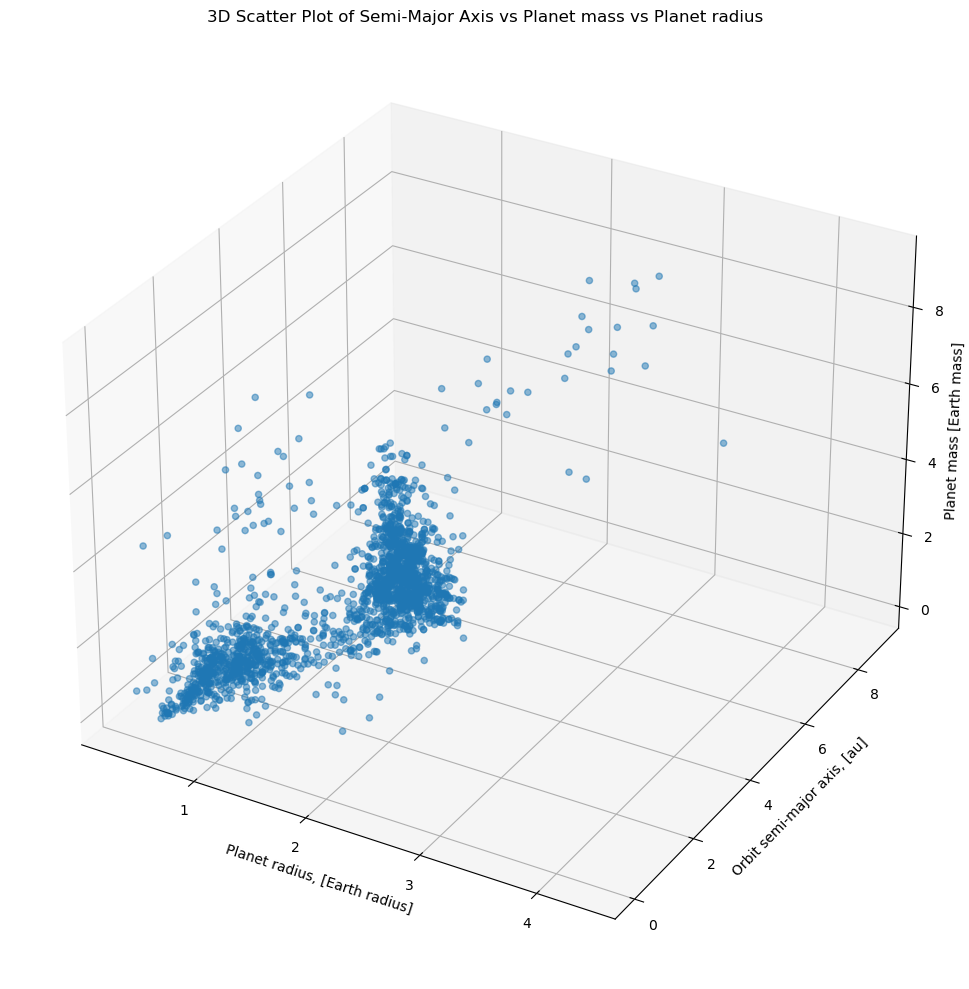

In [113]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is in floats_main dataframe

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=floats_main['pl_rade'], 
           ys=floats_main['pl_orbsmax'], 
           zs=floats_main['pl_bmasse'], 
           alpha=0.5)

# Set axis labels
ax.set_xlabel("Planet radius, [Earth radius]")
ax.set_ylabel("Orbit semi-major axis, [au]")
ax.set_zlabel("Planet mass [Earth mass]")

ax.set_title('3D Scatter Plot of Semi-Major Axis vs Planet mass vs Planet radius')

ax.zaxis.labelpad = 0
# Add grid
ax.grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

In [52]:
df_3d=floats_main[['pl_orbsmax', 'pl_rade', 'pl_bmasse']].copy()
df_3d.shape

(35867, 3)

In [53]:
df_3d_dropped=df_3d.dropna()

In [54]:
df_3d_dropped.shape

(1992, 3)

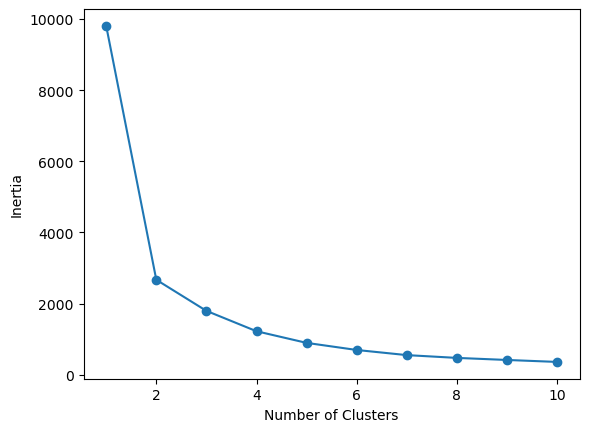

In [55]:
#Searching for optimal number of clusters with the elbow method
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_3d_dropped)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [59]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(df_3d_dropped)

df_3d_dropped['kmeans'] = km.predict(df_3d_dropped)

In [60]:
df_3d_dropped.head()

,pl_orbsmax,pl_rade,pl_bmasse,kmeans
30,5.802118,2.977925,7.841493,1
39,5.056246,2.841473,8.393632,1
102,0.015322,1.056053,2.196113,0
107,0.015706,1.098612,2.264883,0
110,0.015706,1.154678,2.237513,0


In [88]:
df_3d_dropped.describe()

,pl_orbsmax,pl_rade,pl_bmasse,kmeans
count,1992.000000,1992.000000,1992.000000,1992.000000
mean,0.144050,2.157974,4.643678,0.654116
std,0.582968,0.742649,2.008271,0.475775
min,0.005783,0.270027,0.067659,0.000000
25%,0.036289,1.385982,2.693442,0.000000
50%,0.049209,2.529322,5.215315,1.000000
75%,0.082693,2.721427,6.051117,1.000000
max,8.923591,4.361084,9.162819,1.000000


In [200]:
#corr_long = corr_mat.stack().rename_axis(('var1', 'var2')).reset_index(name='correlation')
#corr_long['correlation_abs']=corr_long['correlation'].abs()
#corr_long_sorted=corr_long.sort_values(by=['correlation_abs'], ascending=False)

#corr_long_sorted.head(2)

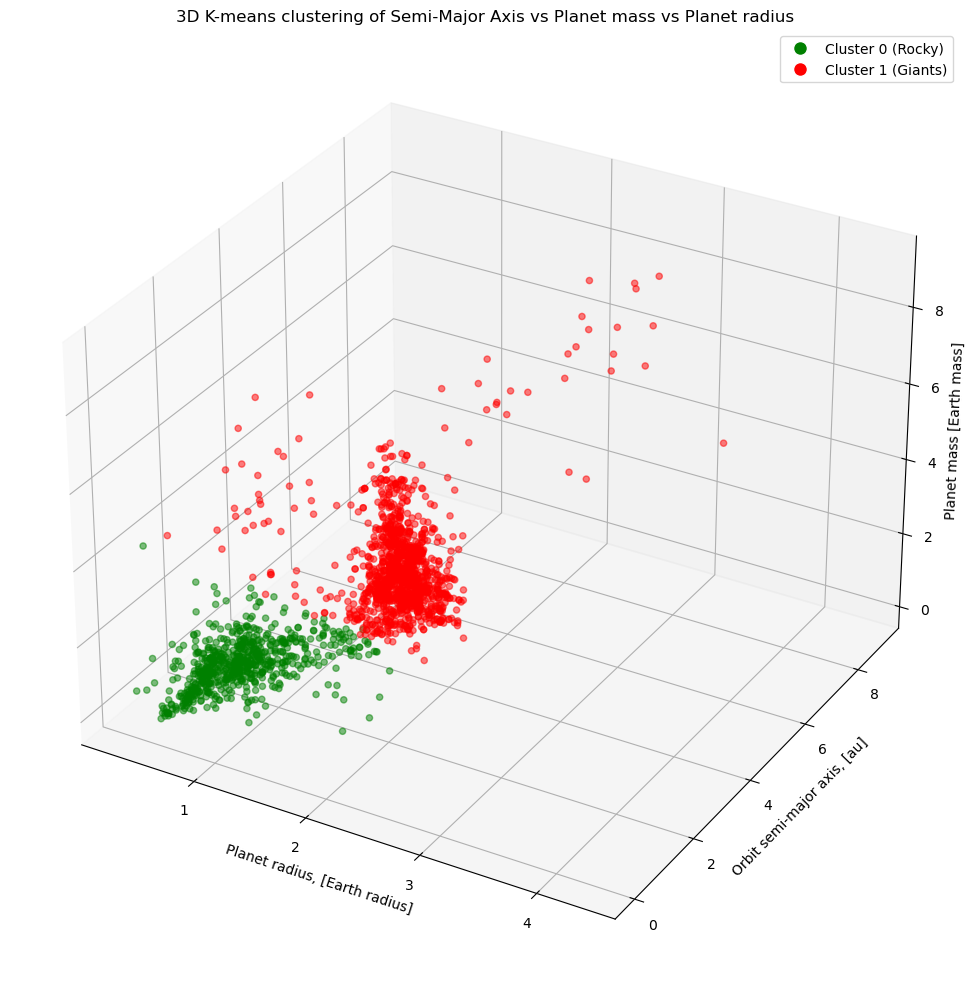

In [115]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

cluster_colors = ['green' if value == 0 else 'red' for value in df_3d_dropped['kmeans']]

# Plot the 3D scatter points
ax.scatter(xs=df_3d_dropped['pl_rade'], 
           ys=df_3d_dropped['pl_orbsmax'], 
           zs=df_3d_dropped['pl_bmasse'], 
           alpha=0.5,
           c=cluster_colors)

# Set axis labels
ax.set_xlabel("Planet radius, [Earth radius]")
ax.set_ylabel("Orbit semi-major axis, [au]")
ax.set_zlabel("Planet mass [Earth mass]")

legend_labels = ['Cluster 0 (Rocky)', 'Cluster 1 (Giants)']  # Adjust labels as needed
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 0'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 1')]
ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right')

ax.set_title('3D K-means clustering of Semi-Major Axis vs Planet mass vs Planet radius')

ax.zaxis.labelpad = 0
# Add grid
ax.grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

## 3D Agglomerative clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering

float_columns=['pl_orbsmax', 'pl_rade', 'pl_bmasse']

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(df_3d_dropped[float_columns])
df_3d_dropped['agglom'] = ag.fit_predict(df_3d_dropped[float_columns])

In [125]:
df_3d_dropped.head()

,pl_orbsmax,pl_rade,pl_bmasse,kmeans,agglom
30,5.802118,2.977925,7.841493,1,0
39,5.056246,2.841473,8.393632,1,0
102,0.015322,1.056053,2.196113,0,1
107,0.015706,1.098612,2.264883,0,1
110,0.015706,1.154678,2.237513,0,1


In [126]:
(df_3d_dropped[['agglom','kmeans']]
 .groupby(['agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
agglom kmeans        
0      0           65
       1         1303
1      0          624

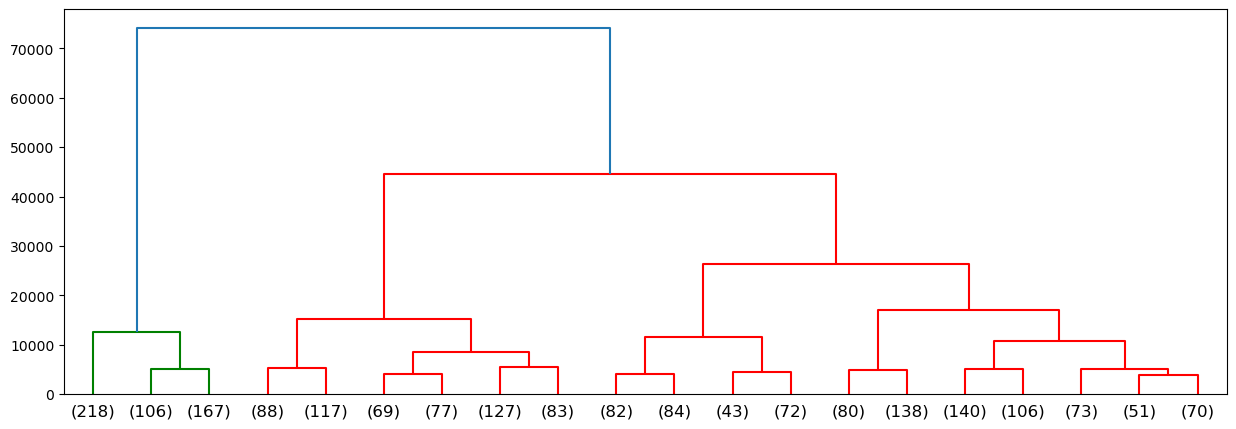

In [128]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
import matplotlib as mpl
from scipy.cluster import hierarchy
from matplotlib.pyplot import cm

Z = hierarchy.linkage(ag.children_, method='ward')

cluster_colors=['green', 'red']
hierarchy.set_link_color_palette(cluster_colors)


fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=20, truncate_mode='lastp',  #change p values to see more or less branches
                           show_leaf_counts=True, ax=ax)


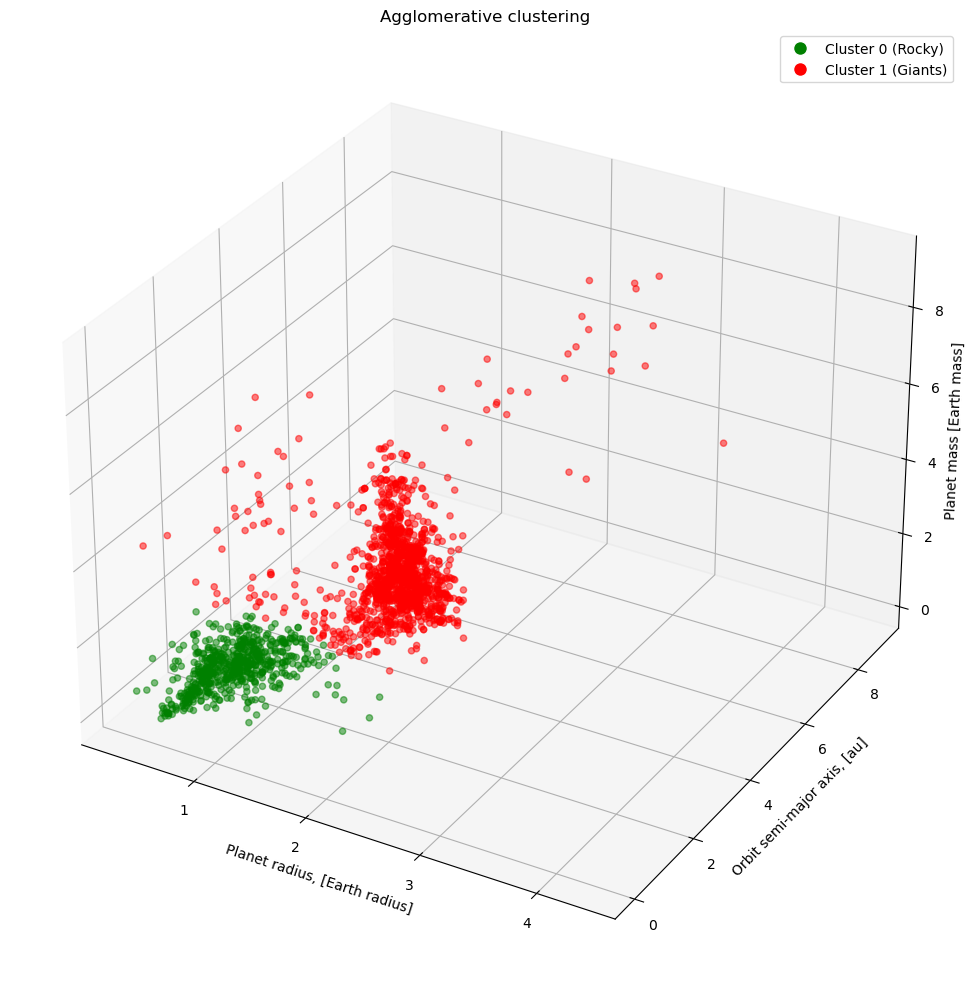

In [129]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

cluster_colors = ['green' if value == 1 else 'red' if value==0 else 'blue' for value in df_3d_dropped['agglom']]

# Plot the 3D scatter points
ax.scatter(xs=df_3d_dropped['pl_rade'], 
           ys=df_3d_dropped['pl_orbsmax'], 
           zs=df_3d_dropped['pl_bmasse'], 
           alpha=0.5,
           c=cluster_colors)

# Set axis labels
ax.set_xlabel("Planet radius, [Earth radius]")
ax.set_ylabel("Orbit semi-major axis, [au]")
ax.set_zlabel("Planet mass [Earth mass]")

legend_labels = ['Cluster 0 (Rocky)', 'Cluster 1 (Giants)']  # Adjust labels as needed
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 0'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 1')]
ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right')

ax.set_title('Agglomerative clustering')

ax.zaxis.labelpad = 0
# Add grid
ax.grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

## 3D Mean Shift

In [140]:
bandwidth=estimate_bandwidth(df_3d_dropped[float_columns])
ms=MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_3d_dropped[float_columns])

MeanShift(bandwidth=1.290727704670574, bin_seeding=True)

In [141]:
ms_labels=ms.labels_
ms_labels

array([2, 2, 1, ..., 3, 1, 1], dtype=int64)

In [142]:
clusters=np.unique(ms_labels)

In [148]:
clusters

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [144]:
df_3d_dropped['mean_shift']=ms.predict(df_3d_dropped[float_columns])

In [145]:
df_3d_dropped.head()

,pl_orbsmax,pl_rade,pl_bmasse,kmeans,agglom,mean_shift
30,5.802118,2.977925,7.841493,1,0,2
39,5.056246,2.841473,8.393632,1,0,2
102,0.015322,1.056053,2.196113,0,1,1
107,0.015706,1.098612,2.264883,0,1,1
110,0.015706,1.154678,2.237513,0,1,1


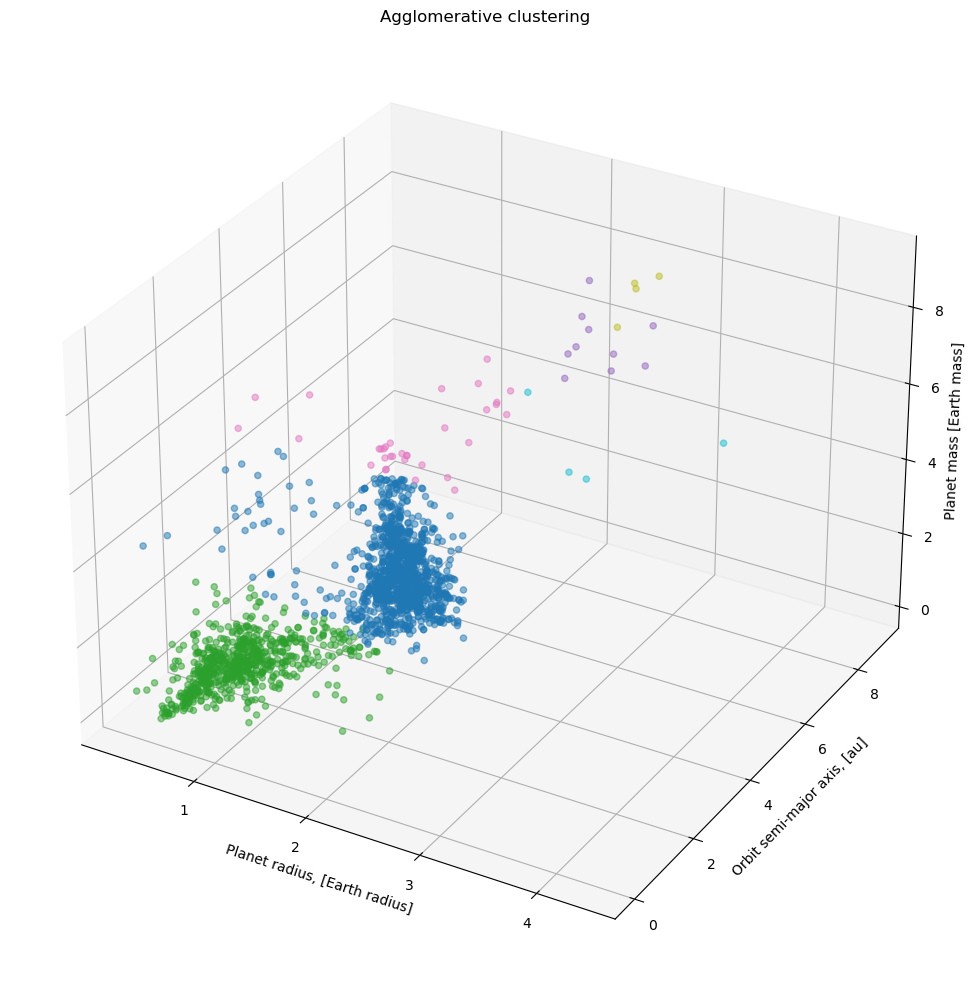

In [150]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


cmap = cm.get_cmap('tab10', len(clusters))

cluster_colors = [cmap(cluster_id) for cluster_id in df_3d_dropped['mean_shift']]

# Plot the 3D scatter points
ax.scatter(xs=df_3d_dropped['pl_rade'], 
           ys=df_3d_dropped['pl_orbsmax'], 
           zs=df_3d_dropped['pl_bmasse'], 
           alpha=0.5,
           c=cluster_colors)

# Set axis labels
ax.set_xlabel("Planet radius, [Earth radius]")
ax.set_ylabel("Orbit semi-major axis, [au]")
ax.set_zlabel("Planet mass [Earth mass]")

ax.set_title('Agglomerative clustering')

ax.zaxis.labelpad = 0
# Add grid
ax.grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

## 3D DBSCAN

In [151]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1, metric='euclidean')
dbscan.fit(df_3d_dropped[float_columns])

DBSCAN(eps=0.1)

In [153]:
df_3d_dropped['dbscan']=dbscan.fit_predict(df_3d_dropped[float_columns])

In [155]:
df_3d_dropped.head()

,pl_orbsmax,pl_rade,pl_bmasse,kmeans,agglom,mean_shift,dbscan
30,5.802118,2.977925,7.841493,1,0,2,-1
39,5.056246,2.841473,8.393632,1,0,2,-1
102,0.015322,1.056053,2.196113,0,1,1,0
107,0.015706,1.098612,2.264883,0,1,1,0
110,0.015706,1.154678,2.237513,0,1,1,0


In [156]:
df_3d_dropped.dbscan.nunique()

19

In [159]:
unique_labels = np.unique(dbscan.labels_)
num_clusters_dbscan = len(unique_labels)

In [201]:
#corr_long_sorted.shape

In [202]:
#df_test=corr_long_sorted[corr_long_sorted['var1'].str[:5]!=corr_long_sorted['var2'].str[:5]]
#df_test.shape

In [203]:
#def match_first_five(row):
#    return row['var1'][:5]==row['var2'][:5]
#corr_long_sorted_drop=corr_long_sorted.drop(corr_long_sorted[corr_long_sorted.apply(match_first_five, axis=1)].index)

In [204]:
#corr_long_sorted_drop.head(5)

## 3rd Kepler Law

In [61]:
df_period_distance=df[['pl_name','sy_snum', 'pl_orbper', 'pl_orbsmax', 'pl_bmasse', 'st_mass']].copy()
df_period_distance=df_period_distance.dropna()

In [62]:
df_period_distance.describe()

,sy_snum,pl_orbper,pl_orbsmax,pl_bmasse,st_mass
count,4177.000000,4.177000e+03,4177.000000,4177.000000,4177.000000
mean,1.231027,1.013685e+05,3.233154,757.407354,1.042981
std,0.487403,6.222301e+06,116.568264,1353.478333,0.493294
min,1.000000,9.070629e-02,0.004400,0.020000,0.010000
25%,1.000000,3.922890e+00,0.048990,25.108570,0.840000
50%,1.000000,1.820123e+01,0.129100,271.744650,1.020000
75%,1.000000,5.261150e+02,1.320000,762.788180,1.210000
max,4.000000,4.020000e+08,7506.000000,17668.169700,10.940000


In [63]:
df_period_distance['sm_axis^3/2']=np.sqrt(df_period_distance['pl_orbsmax']**3)

In [64]:
df_period_distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4177 entries, 1 to 35920
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl_name      4177 non-null   object 
 1   sy_snum      4177 non-null   int64  
 2   pl_orbper    4177 non-null   float64
 3   pl_orbsmax   4177 non-null   float64
 4   pl_bmasse    4177 non-null   float64
 5   st_mass      4177 non-null   float64
 6   sm_axis^3/2  4177 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 261.1+ KB


In [65]:
df_period_distance.head()

,pl_name,sy_snum,pl_orbper,pl_orbsmax,pl_bmasse,st_mass,sm_axis^3/2
1,11 Com b,2,326.03000,1.290,6165.60000,2.70,1.465158
2,11 Com b,2,323.21000,1.178,4914.89849,2.09,1.278551
3,11 UMi b,1,516.21997,1.530,4684.81420,2.78,1.892505
5,11 UMi b,1,516.22000,1.540,3337.07000,1.80,1.911090
6,14 And b,1,186.76000,0.775,1131.15130,1.78,0.682264


In [66]:
df_period_distance.duplicated().sum()

3

In [67]:
df_period_distance.drop_duplicates()

,pl_name,sy_snum,pl_orbper,pl_orbsmax,pl_bmasse,st_mass,sm_axis^3/2
1,11 Com b,2,326.03000,1.29000,6165.60000,2.70,1.465158
2,11 Com b,2,323.21000,1.17800,4914.89849,2.09,1.278551
3,11 UMi b,1,516.21997,1.53000,4684.81420,2.78,1.892505
5,11 UMi b,1,516.22000,1.54000,3337.07000,1.80,1.911090
6,14 And b,1,186.76000,0.77500,1131.15130,1.78,0.682264
...,...,...,...,...,...,...,...
35913,ups And d,2,1278.10000,2.53000,1312.63790,1.15,4.024211
35914,ups And d,2,1276.46000,2.51329,1313.22000,1.30,3.984409
35917,ups Leo b,1,385.20000,1.18000,162.09249,1.48,1.281808
35919,xi Aql b,1,136.75000,0.68000,890.00000,2.20,0.560742


In [68]:
df_period_distance['1/M*sm_axis^3/2']=df_period_distance['sm_axis^3/2']/df_period_distance['st_mass']

In [69]:
df_period_distance=df_period_distance.sort_values(by='pl_orbper', ascending=False)

In [70]:
df_period_distance.head(10)

,pl_name,sy_snum,pl_orbper,pl_orbsmax,pl_bmasse,st_mass,sm_axis^3/2,1/M*sm_axis^3/2
220,COCONUTS-2 b,1,4.020000e+08,7506.000,2002.31896,0.37,650298.631566,1.757564e+06
217,CFHTWIR-Oph 98 b,1,8.040000e+06,200.000,2479.06157,0.01,2828.427125,2.828427e+05
33331,Oph 11 b,1,7.300000e+06,243.000,4449.62000,0.02,3787.995116,1.893998e+05
35800,b Cen AB b,2,1.790000e+06,556.000,3464.32964,5.50,13110.286648,2.383688e+03
3809,HR 8799 b,1,1.700000e+05,68.000,2000.00000,1.50,560.742365,3.738282e+02
3769,HIP 81208 C b,3,1.041000e+05,23.040,4703.86042,0.14,110.592000,7.899429e+02
1778,HD 105618 c,1,7.711407e+04,35.731,8419.59233,1.01,213.583528,2.114688e+02
3297,HD 62364 c,1,7.483995e+04,36.984,7923.46219,1.19,224.916243,1.890052e+02
3812,HR 8799 c,1,6.900000e+04,38.000,3000.00000,1.50,234.247732,1.561652e+02
33366,PZ Tel b,1,4.400000e+04,27.000,8581.36699,1.36,140.296115,1.031589e+02


In [71]:
#Removing top 4 orbital periods from the dataframe
top_6_indices=df_period_distance.head(6).index
df_period_distance=df_period_distance.drop(top_6_indices)

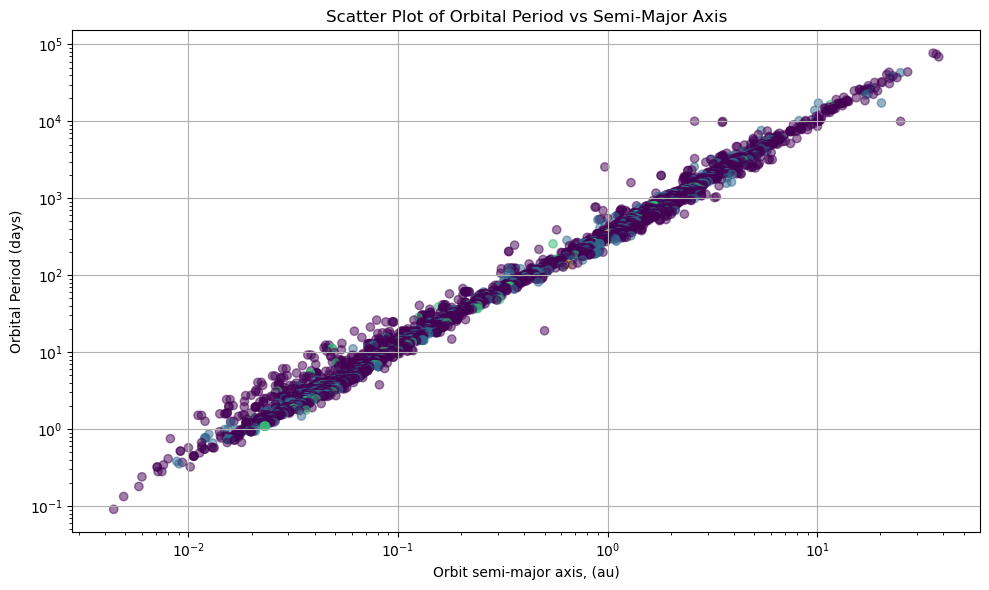

In [72]:
plt.figure(figsize=(10, 6)) 
plt.scatter(y=df_period_distance['pl_orbper'], x=df_period_distance['pl_orbsmax'], c=df_period_distance['sy_snum']*10, alpha=0.5)
plt.ylabel("Orbital Period (days)")
plt.xlabel("Orbit semi-major axis, (au)")
plt.title('Scatter Plot of Orbital Period vs Semi-Major Axis')

#plt.legend(title='Planet Mass (Earth Masses)', scatterpoints=1, loc='upper left', fontsize=8, 
#           labelspacing=1.5, title_fontsize=10, handlelength=2, handletextpad=2, markerscale=0.5, fancybox=True)

plt.xscale('log')
plt.yscale('log')

plt.grid(True)
#plt.legend()
plt.tight_layout()    
plt.show()


In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data (replace with your actual data)
y = np.log10(np.array(df_period_distance['pl_orbper']))  # Feature (independent variable)
X = np.log10(np.array(df_period_distance['pl_orbsmax']))  # Target variable (dependent variable)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X.reshape(-1, 1), y)  # Reshape X to 2D array for fitting

# Make predictions
y_pred = model.predict(X.reshape(-1, 1))  # Reshape X again for prediction

# Print the coefficients (slope and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate mean squared error (optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)

Coefficients: [1.46881615]
Intercept: 2.553528636917229
Mean squared error: 0.009768120619977975


In [74]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.46881615]
Intercept: 2.553528636917229


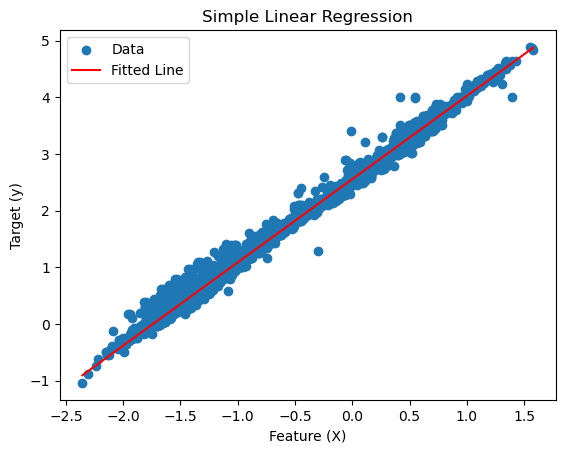

In [75]:
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Fitted Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Simple Linear Regression")
#plt.xlim(0,80000)
#plt.ylim(0,250)
plt.legend()
plt.show()

In [76]:
import altair as alt
from altair import Chart

# Assuming you have a Pandas DataFrame named 'df_period_distance'

chart = Chart(df_period_distance)
num_stars=df_period_distance['sy_snum'].unique()
rng=['orange', 'red', 'green', 'blue']

chart = chart.mark_circle(size=60).encode(
    y=alt.Y('pl_orbper:Q').scale(type="log"),  # Orbital period as x-axis (quantitative)
    x=alt.X('pl_orbsmax:Q').scale(type="log"),  # Semi-major axis (cube root of radius squared) as y-axis (quantitative)
    #size='sy_snum:Q',  # Size of the point based on star_number (quantitative)
    color=alt.Color('sy_snum:N', scale=alt.Scale(domain=num_stars, range=rng)),  # Color based on star_number (quantitative)
    size='pl_bmasse:Q',
    tooltip=['pl_name','pl_orbper', 'pl_orbsmax', 'sy_snum', 'pl_bmasse'],  # Display these columns on hover
    
)
chart = chart.properties(
    width=1000,  # Set chart width
    height=700,  # Set chart height
    title='Scatter Plot of Orbital period vs Semi-Major Axis R^3/2'# Set chart title
).configure(background='grey').configure_title(
    fontSize=16, color='white').interactive().configure_axis(
    grid=False, labelColor='white')#.configure_axisX(title="Orbital Period (Days)")


# Display the chart
chart

alt.Chart(...)

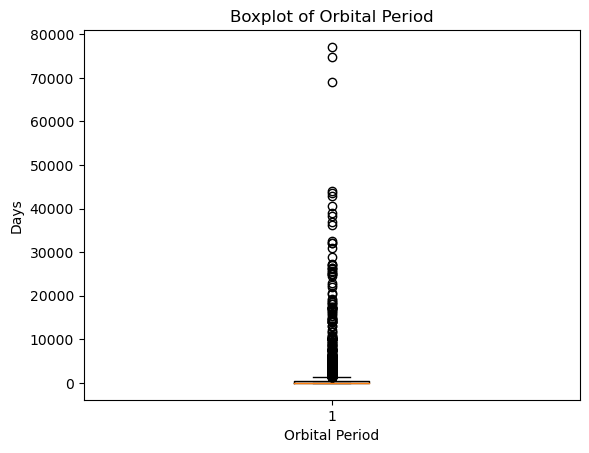

In [77]:
plt.boxplot(df_period_distance['pl_orbper'])

# Set labels and title
plt.xlabel('Orbital Period')
plt.ylabel('Days')
plt.title('Boxplot of Orbital Period')


# Show the plot
plt.show()

# Density

## Plot

In [78]:
df_density=df[['pl_orbsmax', 'pl_rade', 'pl_bmasse']].copy()
df_density=df_density.dropna()

In [79]:

#df_density['distance_log']=np.log10(df_density['pl_orbsmax'])
#df_density['mass_log']=np.log10(df_density['pl_bmasse'])
earth_mass=5.972e24 # kilos
earth_radius=6.371e6 # meters

df_density['mass_kg']=df_density['pl_bmasse']*earth_mass
df_density['volume_m3']=(4/3)*np.pi*(df_density['pl_rade']*earth_radius)**3

df_density['density']=df_density['mass_kg']/df_density['volume_m3']

In [80]:
df_density.head()

,pl_orbsmax,pl_rade,pl_bmasse,mass_kg,volume_m3,density
30,330.00000,18.647,2543.000,1.518680e+28,7.023253e+24,2162.359120
39,156.00000,16.141,4417.837,2.638332e+28,4.555151e+24,5791.975953
102,0.01544,1.875,7.990,4.771628e+25,7.140280e+21,6682.690343
107,0.01583,2.000,8.630,5.153836e+25,8.665655e+21,5947.427864
110,0.01583,2.173,8.370,4.998564e+25,1.111452e+22,4497.328940


In [81]:
df_density.describe()

,pl_orbsmax,pl_rade,pl_bmasse,mass_kg,volume_m3,density
count,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1.992000e+03
mean,7.977343,9.823144,451.719224,2.697667e+27,2.346273e+24,9.565919e+03
std,181.417285,6.075429,941.853486,5.624749e+27,1.146979e+25,1.116297e+05
min,0.005800,0.310000,0.070000,4.180400e+23,3.226982e+19,3.025108e+01
25%,0.036955,2.998750,13.782500,8.230909e+25,2.921009e+22,5.292692e+02
50%,0.050440,11.545000,183.070080,1.093295e+27,1.666837e+24,1.202171e+03
75%,0.086208,14.202000,423.587932,2.529667e+27,3.102844e+24,3.694681e+03
max,7506.000000,77.342000,9534.900000,5.694242e+28,5.011383e+26,4.122964e+06


Text(0.5, 1.0, 'Scatter Plot of Planet mass vs Semi-Major Axis')

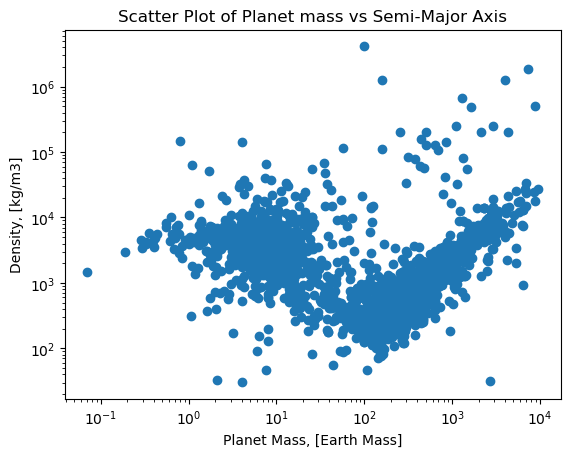

In [82]:
plt.scatter(x=df_density['pl_bmasse'], y=df_density['density'])
plt.ylabel("Density, [kg/m3]")
plt.xlabel("Planet Mass, [Earth Mass]")
#plt.xlim(0,40)
#plt.ylim(0,2000)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Planet mass vs Semi-Major Axis')

In [83]:
array_density=df_density[['pl_bmasse','density']].to_numpy()
array_density_log=np.log10(array_density)

## K-Means Clustering

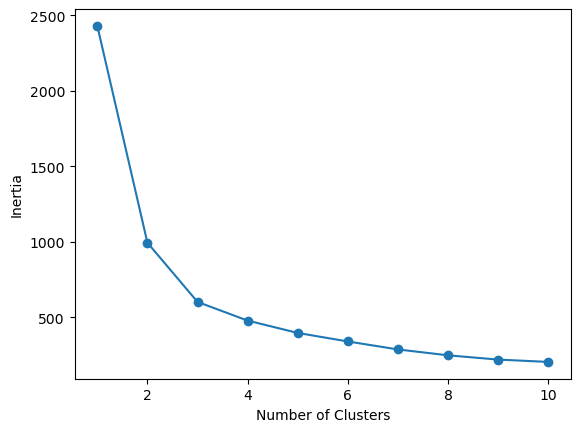

In [84]:


inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(array_density_log)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [85]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
        plt.xlabel("log Planet Mass, [Earth Mass]")
        plt.ylabel("log Density, [kg/m3]")
        plt.title(f'K-Means Clustering Plot of Planet mass vs Density, k = {num_clusters}')

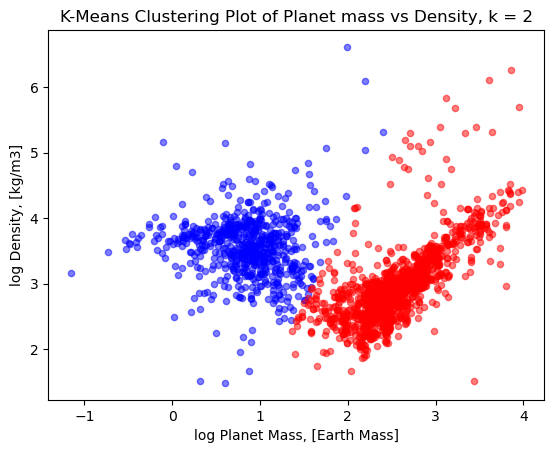

In [86]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(array_density_log)
display_cluster(array_density_log,km,num_clusters)

## DBSCAN using Euclidean

In [231]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1, metric='euclidean')
dbscan.fit(array_density_log)

DBSCAN(eps=0.1)

In [232]:
labels=dbscan.labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [233]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 216


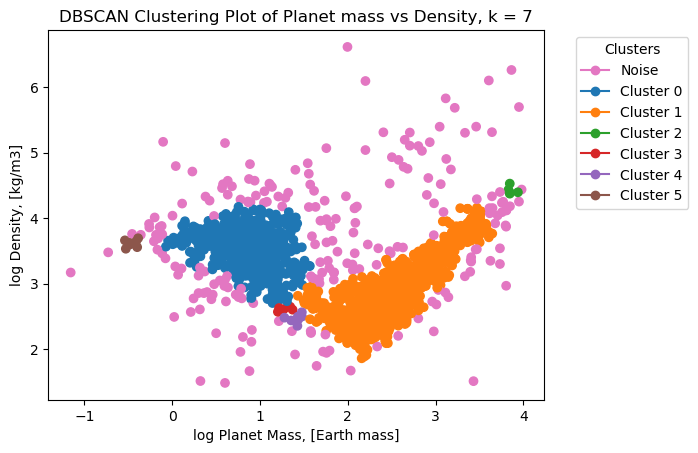

In [234]:
unique_labels = np.unique(dbscan.labels_)
num_clusters = len(unique_labels)
colors = plt.cm.get_cmap('tab10')(np.arange(num_clusters))  # Choose a colormap

# Scatter plot with coloring based on labels
plt.scatter(array_density_log[:, 0], array_density_log[:, 1], c=colors[dbscan.labels_])

# Create a legend based on cluster labels
cluster_labels = {label: f"Cluster {label}" for label in unique_labels}
if -1 in unique_labels:  # Add label for noise points (if present)
    cluster_labels[-1] = 'Noise'
legend_handles = [plt.Line2D([], [], marker='o', color=colors[label]) for label in unique_labels]
plt.legend(legend_handles, cluster_labels.values(), title='Clusters')

# Legend outside the plot
plt.legend(legend_handles, cluster_labels.values(), title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust position as desired

plt.ylabel("log Density, [kg/m3]")
plt.xlabel("log Planet Mass, [Earth mass]")
plt.title(f'DBSCAN Clustering Plot of Planet mass vs Density, k = {num_clusters}')

# Display the plot
plt.show()

## Gaussian Mixture Model

In [235]:
gm2 = GaussianMixture(n_components=3, random_state=0).fit(array_density_log)
print("Means of the 2 Gaussians fitted by GMM are\n")
print(gm2.means_)

Means of the 2 Gaussians fitted by GMM are

[[0.9381531  3.47364356]
 [2.51936166 2.85245864]
 [3.32304748 4.21184693]]


In [236]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    
    """
    Draw an ellipse with a given position and covariance
    
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

In [237]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


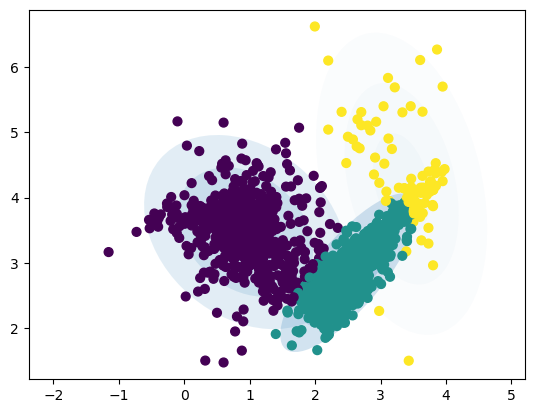

In [238]:
plot_gmm(GaussianMixture(n_components=3, random_state=0), # the model 
          array_density_log) # 

## Mean Shift

In [239]:
bandwidth=estimate_bandwidth(array_density_log)
ms=MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(array_density_log)

MeanShift(bandwidth=0.8380061904758179, bin_seeding=True)

In [240]:
ms_labels=ms.labels_
ms_labels

array([0, 2, 1, ..., 2, 1, 1], dtype=int64)

In [241]:
np.unique(ms_labels)

array([0, 1, 2, 3], dtype=int64)

In [242]:
ms_clusters=ms.predict(array_density_log)
ms_clusters

array([0, 2, 1, ..., 2, 1, 1], dtype=int64)

In [243]:
ms.cluster_centers_

array([[2.44906861, 2.80227658],
       [0.86547377, 3.54618743],
       [2.87417718, 4.98246224],
       [2.09883828, 6.35480638]])

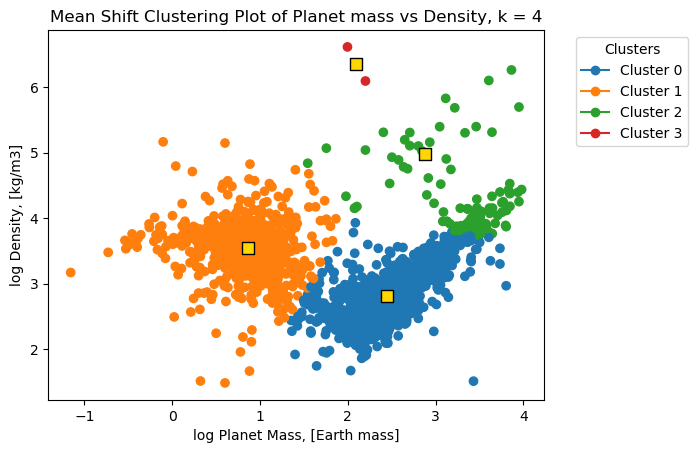

In [244]:
unique_labels = np.unique(ms.labels_)
num_clusters = len(unique_labels)
colors = plt.cm.get_cmap('tab10')(np.arange(num_clusters))  # Choose a colormap

# Scatter plot with coloring based on labels
plt.scatter(array_density_log[:, 0], array_density_log[:, 1], c=colors[ms.labels_])

# Create a legend based on cluster labels
cluster_labels = {label: f"Cluster {label}" for label in unique_labels}
#centroid_labels = {label: f"Centroid {label}" for label in range(num_clusters)}

if -1 in unique_labels:  # Add label for noise points (if present)
    cluster_labels[-1] = 'Noise'
legend_handles = [plt.Line2D([], [], marker='o', color=colors[label]) for label in unique_labels]

# Plot centroids with larger markers and a distinct color
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], marker='s', s=80, edgecolors='black', c='gold', linewidths=1)

# Legend outside the plot
plt.legend(legend_handles, cluster_labels.values(),title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust position as desired
#plt.legend(legend_handles, centroid_labels.values(),title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel("log Density, [kg/m3]")
plt.xlabel("log Planet Mass, [Earth mass]")
plt.title(f'Mean Shift Clustering Plot of Planet mass vs Density, k = {num_clusters}')

# Display the plot
plt.show()

# Distance to mass

In [245]:
array_mass=df_period_distance[['pl_orbsmax', 'pl_bmasse']].to_numpy()
array_mass_log=np.log10(array_mass)

Text(0.5, 1.0, 'Scatter Plot of Planet mass vs Semi-Major Axis')

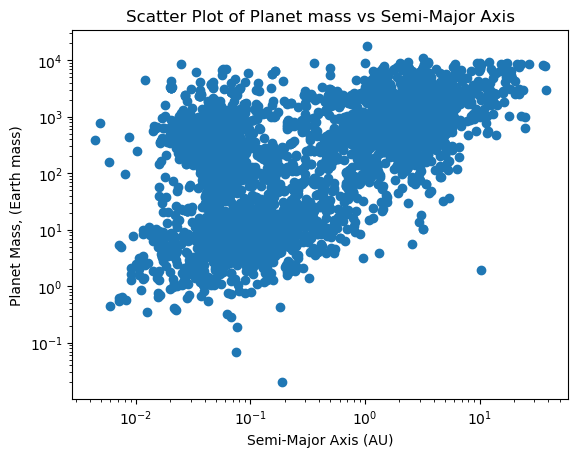

In [246]:
plt.scatter(x=df_period_distance['pl_orbsmax'], y=df_period_distance['pl_bmasse'])
plt.ylabel("Planet Mass, (Earth mass)")
plt.xlabel("Semi-Major Axis (AU)")
#plt.xlim(0,40)
#plt.ylim(0,2000)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Planet mass vs Semi-Major Axis')

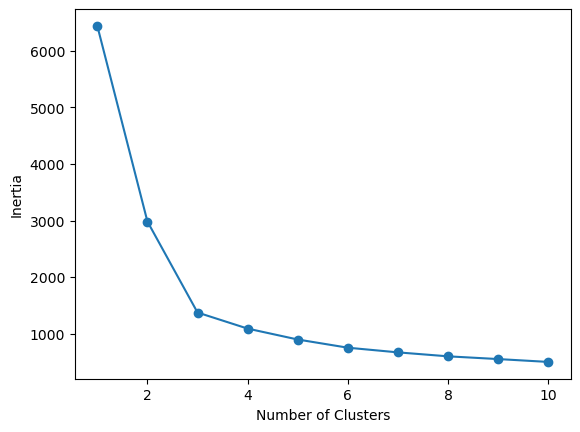

In [247]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(array_mass_log)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

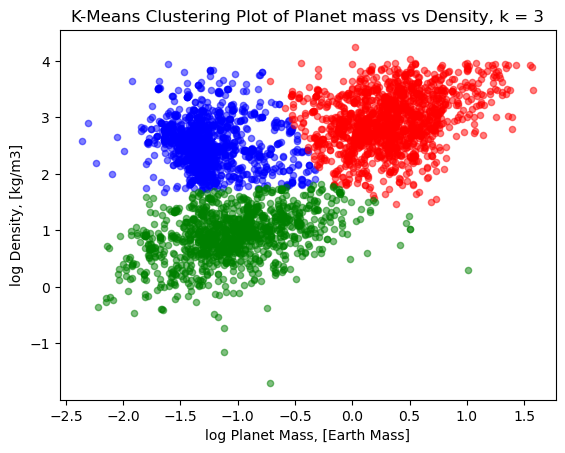

In [248]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(array_mass_log)
display_cluster(array_mass_log,km,num_clusters)

In [249]:
gm = GaussianMixture(n_components=3, random_state=0).fit(array_mass_log)
print("Means of the 3 Gaussians fitted by GMM are\n")
print(gm.means_)

Means of the 3 Gaussians fitted by GMM are

[[-1.02410253  0.93530787]
 [ 0.25742314  2.91402492]
 [-1.31862806  2.49673431]]


In [250]:
print("Covariances of the 3 Gaussians fitted by GMM are")
gm.covariances_

Covariances of the 3 Gaussians fitted by GMM are


array([[[ 0.20388061,  0.09425874],
        [ 0.09425874,  0.22053092]],

       [[ 0.17471127,  0.07415649],
        [ 0.07415649,  0.24666191]],

       [[ 0.04465784, -0.0073218 ],
        [-0.0073218 ,  0.17607191]]])

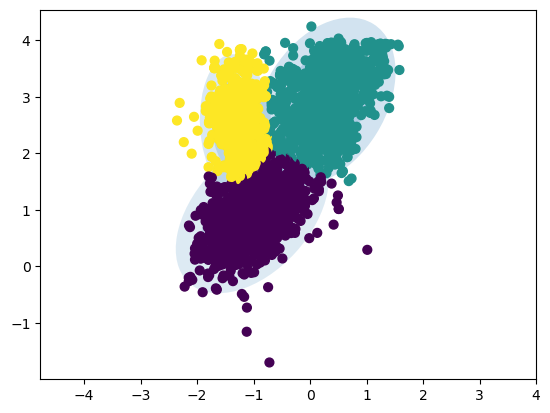

In [251]:
plot_gmm(GaussianMixture(n_components=3, random_state=0), # the model, 
          array_mass_log) # simulated Gaussian mixture data

In [252]:
from sklearn.cluster import DBSCAN
dbscan_mass=DBSCAN(eps=0.1, metric='euclidean')
dbscan_mass.fit(array_mass_log)

DBSCAN(eps=0.1)

In [253]:
labels_mass=dbscan_mass.labels_
np.unique(labels_mass)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [254]:
n_clusters_ = len(set(labels_mass)) - (1 if -1 in labels_mass else 0)
n_noise_ = list(labels_mass).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 12
Estimated number of noise points: 150


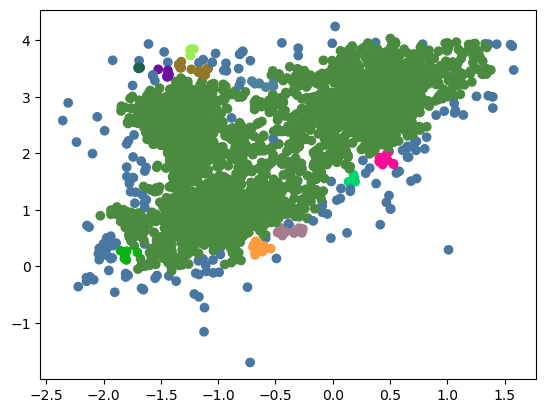

In [255]:
colors = np.random.random(size=3*(dbscan_mass.labels_.max()+1)).reshape(-1, 3)
plt.scatter(array_mass_log[:, 0], array_mass_log[:, 1], c=[colors[l] for l in dbscan_mass.labels_])
plt.show()